In [5]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/sqJIpHYl7oo", width=1920/2, height=1080/2)

--Based on the Qiskit Youtube Tutorial above--

In [124]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

from matplotlib import style
style.use("dark_background")

In [125]:
secretnumber = '1001'
n = len(secretnumber)

In [128]:
#circuit = QuantumCircuit(6+1, 6) # Six which is the number of qubits plus one qubit and 6 classical bits in which we will store the results.
circuit = QuantumCircuit(n+1, n)

#circuit.h([0,1,2,3])
circuit.h(range(n)) # This way we can apply the H gate to all secret numbers
#circuit.x(6)
circuit.x(n) # apply this gate to our last qubit
#circuit.h(6)
circuit.h(n) # apply this gate to our last qubit


circuit.barrier()

#for every 1 in the sercet number we are applying a CX gate

#circuit.cx(3, 4) # put a cx gate from the 5th to the 6th qubit
#circuit.cx(0, 4) # put a cx gate from the 0th to the 6th qubit 

for ii, yesno in enumerate(reversed(secretnumber)): # reverses the secretnumber
        if yesno == '1':
            circuit.cx(ii, n)

circuit.barrier()

#circuit.h([0,1,2,3])
circuit.h(range(n))

circuit.barrier()

#lets measure

#circuit.measure([0,1,2,3], [0,1,2,3]) 
circuit.measure(range(n), range(n))

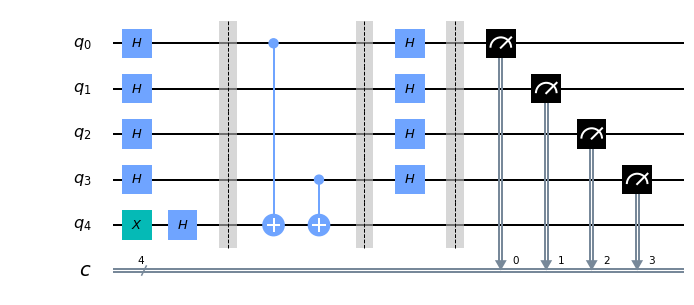

In [129]:
circuit.draw(output = 'mpl')

Behold the Bernstein-Vazirani Algorithm. Let's see how the circuit works

In [130]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()

In [131]:
print(counts)

{'1001': 1}


Lets Visualize our results

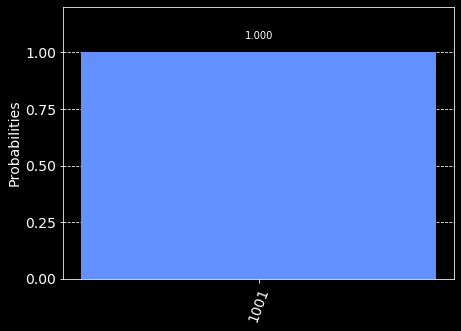

In [132]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

There it is. Our secret number

Lets Try with more shots

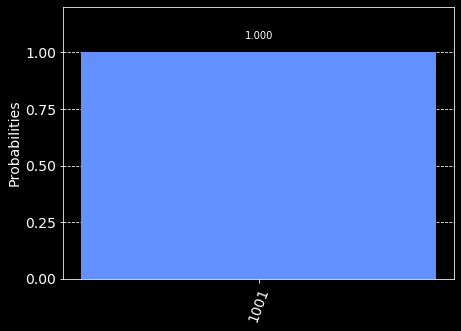

In [133]:
result = execute(circuit, backend=simulator, shots=1000).result()
plot_histogram(result.get_counts(circuit))

Same efficacy

Lets run this algorithm in a real Quantum Computer

In [136]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-04 19:40:38,854: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [137]:
provider = IBMQ.get_provider('ibm-q')

In [138]:
qcomp = provider.get_backend('ibmq_burlington')

In [139]:
job = execute(circuit, backend=qcomp)

In [140]:
from qiskit.tools.monitor import job_monitor

In [141]:
job_monitor(job)

Job Status: job has successfully run


In [142]:
result = job.result()

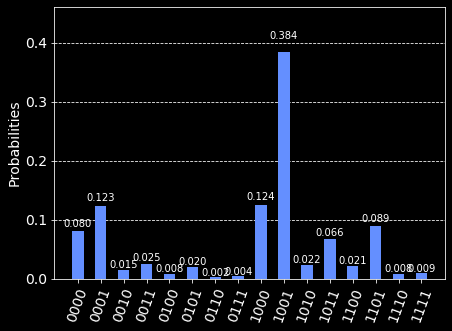

In [143]:
plot_histogram(result.get_counts(circuit)) 

As you can see when running this algorithm in a real quantum computer it displays our most probable answer in, you guessed it, probabilities. An Ideal Quantum Computer (for example a simulator like the QASM simulator) would displat the 1001 result with 100% certainty (check examples above where we used the QASM Simulator).

So, in this example, the most probable answer is 1001 by 38,4%.

In [146]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.17.0'}

In [145]:
import qiskit.tools.jupyter
%qiskit_copyright